<a href="https://colab.research.google.com/github/MMQuants/COT_report/blob/main/COT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')




In [3]:
url = (
    "https://publicreporting.cftc.gov/resource/gpe5-46if.csv"
    "?market_and_exchange_names=BITCOIN%20-%20CHICAGO%20MERCANTILE%20EXCHANGE"
)

df = pd.read_csv(url, parse_dates=["report_date_as_yyyy_mm_dd"])

df.sort_values("report_date_as_yyyy_mm_dd", inplace=True)

df.tail()

,id,market_and_exchange_names,report_date_as_yyyy_mm_dd,yyyy_report_week_ww,contract_market_name,cftc_contract_market_code,cftc_market_code,cftc_region_code,cftc_commodity_code,commodity_name,...,conc_net_le_4_tdr_long_all,conc_net_le_4_tdr_short_all,conc_net_le_8_tdr_long_all,conc_net_le_8_tdr_short_all,contract_units,cftc_subgroup_code,commodity,commodity_subgroup_name,commodity_group_name,futonly_or_combined
402,251223133741F,BITCOIN - CHICAGO MERCANTILE EXCHANGE,2025-12-23,2025 Report Week 51,BITCOIN,133741,CME,CHI,133,BITCOIN,...,64.6,26.4,72.1,41.4,(5 Bitcoins),F85,BITCOIN,DIGITAL ASSET,FINANCIAL INSTRUMENTS,FutOnly
403,251230133741F,BITCOIN - CHICAGO MERCANTILE EXCHANGE,2025-12-30,2025 Report Week 52,BITCOIN,133741,CME,CHI,133,BITCOIN,...,69.7,29.5,76.4,44.8,(5 Bitcoins),F85,BITCOIN,DIGITAL ASSET,FINANCIAL INSTRUMENTS,FutOnly
404,260106133741F,BITCOIN - CHICAGO MERCANTILE EXCHANGE,2026-01-06,2026 Report Week 01,BITCOIN,133741,CME,CHI,133,BITCOIN,...,67.8,28.6,74.7,42.5,(5 Bitcoins),F85,BITCOIN,DIGITAL ASSET,FINANCIAL INSTRUMENTS,FutOnly
405,260113133741F,BITCOIN - CHICAGO MERCANTILE EXCHANGE,2026-01-13,2026 Report Week 02,BITCOIN,133741,CME,CHI,133,BITCOIN,...,66.7,23.6,73.1,37.6,(5 Bitcoins),F85,BITCOIN,DIGITAL ASSET,FINANCIAL INSTRUMENTS,FutOnly
406,260120133741F,BITCOIN - CHICAGO MERCANTILE EXCHANGE,2026-01-20,2026 Report Week 03,BITCOIN,133741,CME,CHI,133,BITCOIN,...,62.1,23.6,70.3,39.1,(5 Bitcoins),F85,BITCOIN,DIGITAL ASSET,FINANCIAL INSTRUMENTS,FutOnly


#Important Features

##Leveraged Funds ( speculators)

lev_money_long_all

lev_money_short_all

lev_money_spread_all

##Asset Managers

asset_mgr_long_all

asset_mgr_short_all

##Dealer / Intermediary positioning

dealer_long_all

dealer_short_all

##Open interest

open_interest_all

In [6]:
df.columns

Index(['id', 'market_and_exchange_names', 'report_date_as_yyyy_mm_dd',
       'yyyy_report_week_ww', 'contract_market_name',
       'cftc_contract_market_code', 'cftc_market_code', 'cftc_region_code',
       'cftc_commodity_code', 'commodity_name', 'open_interest_all',
       'dealer_positions_long_all', 'dealer_positions_short_all',
       'dealer_positions_spread_all', 'asset_mgr_positions_long',
       'asset_mgr_positions_short', 'asset_mgr_positions_spread',
       'lev_money_positions_long', 'lev_money_positions_short',
       'lev_money_positions_spread', 'other_rept_positions_long',
       'other_rept_positions_short', 'other_rept_positions_spread',
       'tot_rept_positions_long_all', 'tot_rept_positions_short',
       'nonrept_positions_long_all', 'nonrept_positions_short_all',
       'change_in_open_interest_all', 'change_in_dealer_long_all',
       'change_in_dealer_short_all', 'change_in_dealer_spread_all',
       'change_in_asset_mgr_long', 'change_in_asset_mgr_short',
 

In [35]:
cotData = pd.DataFrame(df['report_date_as_yyyy_mm_dd'])

cotData["Lev_Money_Positions_Long_All"] = df["lev_money_positions_long"]
cotData["Lev_Money_Positions_Short_All"] = df["lev_money_positions_short"]
cotData["Change_in_Lev_Money_Long_All"] = df["change_in_lev_money_long"]
cotData["Change_in_Lev_Money_Short_All"] = df["change_in_lev_money_short"]
cotData["Pct_of_OI_Lev_Money_Long_All"] = df["pct_of_oi_lev_money_long"]
cotData["Pct_of_OI_Lev_Money_Short_All"] = df["pct_of_oi_lev_money_short"]
cotData["Flip"] = cotData["Pct_of_OI_Lev_Money_Long_All"] - cotData["Pct_of_OI_Lev_Money_Short_All"]
cotData.head()

cotData

,report_date_as_yyyy_mm_dd,Lev_Money_Positions_Long_All,Lev_Money_Positions_Short_All,Change_in_Lev_Money_Long_All,Change_in_Lev_Money_Short_All,Pct_of_OI_Lev_Money_Long_All,Pct_of_OI_Lev_Money_Short_All,Flip
333,2018-04-10,902,1108,NaN,NaN,53.0,65.1,-12.1
332,2018-04-17,1053,1313,151.0,205.0,51.9,64.7,-12.8
331,2018-04-24,1194,1682,141.0,369.0,50.2,70.7,-20.5
330,2018-05-01,1198,1348,4.0,-334.0,60.2,67.7,-7.5
329,2018-05-08,1284,1707,86.0,359.0,51.7,68.7,-17.0
...,...,...,...,...,...,...,...,...
402,2025-12-23,2686,13937,-406.0,-1698.0,12.2,63.4,-51.2
403,2025-12-30,2115,13026,-571.0,-911.0,10.5,64.6,-54.1
404,2026-01-06,2554,14294,439.0,1268.0,11.5,64.5,-53.0
405,2026-01-13,2690,15408,136.0,1114.0,11.3,64.6,-53.3


In [10]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [36]:
btc = pd.read_excel('/content/drive/MyDrive/BTC weekly Price 2018-2026/BITCOIN weekly.xlsx',
                          names = ['Date','Price', 'Open','High','Low','Vol','Change%'])
btc.head()

,Date,Price,Open,High,Low,Vol,Change%
0,2026-01-11,95141.4,90485.1,97838.4,90134.5,391.85K,0.0515
1,2026-01-04,90485.1,90621.9,94745.2,89347.3,356.73K,-0.0015
2,2025-12-28,90621.9,87853.0,90913.5,86827.7,307.43K,0.0315
3,2025-12-21,87850.8,88364.1,90457.5,86448.4,276.28K,-0.0058
4,2025-12-14,88364.0,90248.3,90472.3,84490.5,372.50K,-0.0209


In [37]:
btc_sorted = btc.set_index('Date').sort_index()

btc_sorted.head()

,Price,Open,High,Low,Vol,Change%
Date,,,,,,
2018-04-15,8923.1,8004.6,9027.7,7852.8,1.27M,0.1148
2018-04-22,9352.4,8923.6,9753.1,8669.8,1.60M,0.0481
2018-04-29,9853.5,9352.2,9992.8,8851.0,1.17M,0.0536
2018-05-06,8459.5,9859.4,9957.7,8184.1,1.26M,-0.1415
2018-05-13,8245.1,8483.6,8758.4,8055.5,1.14M,-0.0253


In [38]:
btc_sorted['Price']

,Price
Date,
2018-04-15,8923.1
2018-04-22,9352.4
2018-04-29,9853.5
2018-05-06,8459.5
2018-05-13,8245.1
...,...
2025-12-14,88364.0
2025-12-21,87850.8
2025-12-28,90621.9


In [39]:
cotData['Bitcoin'] = btc_sorted['Price'].reset_index(drop=True)


cotData.head()

,report_date_as_yyyy_mm_dd,Lev_Money_Positions_Long_All,Lev_Money_Positions_Short_All,Change_in_Lev_Money_Long_All,Change_in_Lev_Money_Short_All,Pct_of_OI_Lev_Money_Long_All,Pct_of_OI_Lev_Money_Short_All,Flip,Bitcoin
333,2018-04-10,902,1108,NaN,NaN,53.0,65.1,-12.1,54156.5
332,2018-04-17,1053,1313,151.0,205.0,51.9,64.7,-12.8,58978.6
331,2018-04-24,1194,1682,141.0,369.0,50.2,70.7,-20.5,64159.3
330,2018-05-01,1198,1348,4.0,-334.0,60.2,67.7,-7.5,59483.1
329,2018-05-08,1284,1707,86.0,359.0,51.7,68.7,-17.0,60931.7


In [40]:
cotData = cotData.dropna(axis=0)
cotData.head()

,report_date_as_yyyy_mm_dd,Lev_Money_Positions_Long_All,Lev_Money_Positions_Short_All,Change_in_Lev_Money_Long_All,Change_in_Lev_Money_Short_All,Pct_of_OI_Lev_Money_Long_All,Pct_of_OI_Lev_Money_Short_All,Flip,Bitcoin
332,2018-04-17,1053,1313,151.0,205.0,51.9,64.7,-12.8,58978.6
331,2018-04-24,1194,1682,141.0,369.0,50.2,70.7,-20.5,64159.3
330,2018-05-01,1198,1348,4.0,-334.0,60.2,67.7,-7.5,59483.1
329,2018-05-08,1284,1707,86.0,359.0,51.7,68.7,-17.0,60931.7
328,2018-05-15,1338,1657,54.0,-50.0,53.4,66.1,-12.7,60696.7


In [42]:
cotData.set_index('report_date_as_yyyy_mm_dd', inplace=True)
cotData.head()

,Lev_Money_Positions_Long_All,Lev_Money_Positions_Short_All,Change_in_Lev_Money_Long_All,Change_in_Lev_Money_Short_All,Pct_of_OI_Lev_Money_Long_All,Pct_of_OI_Lev_Money_Short_All,Flip,Bitcoin
report_date_as_yyyy_mm_dd,,,,,,,,
2018-04-17,1053,1313,151.0,205.0,51.9,64.7,-12.8,58978.6
2018-04-24,1194,1682,141.0,369.0,50.2,70.7,-20.5,64159.3
2018-05-01,1198,1348,4.0,-334.0,60.2,67.7,-7.5,59483.1
2018-05-08,1284,1707,86.0,359.0,51.7,68.7,-17.0,60931.7
2018-05-15,1338,1657,54.0,-50.0,53.4,66.1,-12.7,60696.7


In [43]:
toChart = cotData[['Flip' ,	'Bitcoin']]
toChart.head()

,Flip,Bitcoin
report_date_as_yyyy_mm_dd,,
2018-04-17,-12.8,58978.6
2018-04-24,-20.5,64159.3
2018-05-01,-7.5,59483.1
2018-05-08,-17.0,60931.7
2018-05-15,-12.7,60696.7


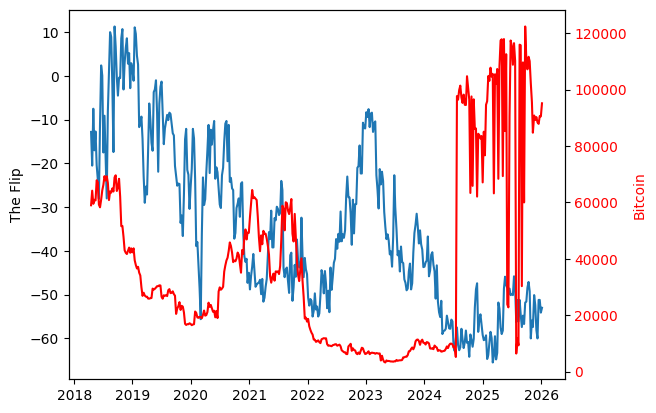

In [45]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.plot( toChart["Flip"])
ax1.set_ylabel('The Flip')

ax2 = ax1.twinx()
ax2.plot( toChart['Bitcoin'], 'r-')
ax2.set_ylabel('Bitcoin', color='r')
for tl in ax2.get_yticklabels():
    tl.set_color('r')

#plt.savefig('proba.png')


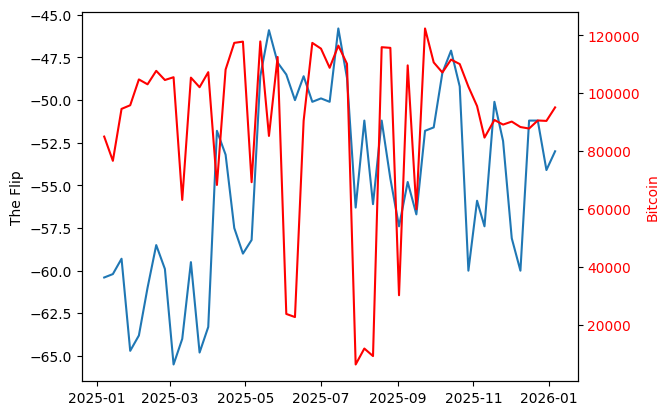

In [50]:
filtered_df = toChart[toChart.index >= '2025-01-01']

fig1 = plt.figure()
ax1 = fig1.add_subplot(111)
ax1.plot( filtered_df["Flip"])
ax1.set_ylabel('The Flip')

ax2 = ax1.twinx()
ax2.plot( filtered_df['Bitcoin'], 'r-')
ax2.set_ylabel('Bitcoin', color='r')
for tl in ax2.get_yticklabels():
    tl.set_color('r')